In [90]:
#dependencies
import pandas as pd
df = pd.read_csv('full_movie_data_1500.csv')
df.head()

,Title,Year,Genres,Plot
0,Toy Story,1995,"Animation, Adventure, Comedy",A little boy named Andy loves to be in his roo...
1,Jumanji,1995,"Adventure, Family, Fantasy",After being trapped in a jungle board game for...
2,Grumpier Old Men,1995,"Comedy, Romance",Things don't seem to change much in Wabasha Co...
3,Waiting to Exhale,1995,"Comedy, Drama, Romance",This story based on the best selling novel by ...
4,Father of the Bride Part II,1995,"Comedy, Family, Romance","In this sequel to ""Father of the Bride"", Georg..."


In [91]:
from io import StringIO

In [92]:
new_genres=[]
genres=df['Genres'].tolist()
for genre in genres:
    new_genres.append(genre.split(','))
print(new_genres)
Genres=pd.DataFrame(new_genres)
Genres.columns = ['Genre','Genre2','Genre3']
Genres.head()

[['Animation', ' Adventure', ' Comedy'], ['Adventure', ' Family', ' Fantasy'], ['Comedy', ' Romance'], ['Comedy', ' Drama', ' Romance'], ['Comedy', ' Family', ' Romance'], ['Adventure', ' Comedy', ' Drama'], ['Action', ' Crime', ' Thriller'], ['Action', ' Adventure', ' Thriller'], ['Animation', ' Adventure', ' Drama'], ['Biography', ' Drama', ' History'], ['Action', ' Adventure', ' Comedy'], ['Crime', ' Drama'], ['Drama', ' Romance'], ['Comedy'], ['Adventure', ' Comedy', ' Crime'], ['Action', ' Comedy', ' Crime'], ['Comedy', ' Crime', ' Thriller'], ['Drama', ' Mystery', ' Thriller'], ['Action', ' Crime', ' Thriller'], ['Drama', ' Fantasy', ' Mystery'], ['Drama', ' Romance'], ['Drama', ' Romance'], ['Comedy', ' Drama', ' Romance'], ['Drama', ' Romance'], ['Fantasy', ' Sci-Fi'], ['Crime', ' Drama', ' Romance'], ['Biography', ' Drama'], ['Mystery', ' Sci-Fi', ' Thriller'], ['Comedy', ' Drama', ' Family'], ['Biography', ' Drama', ' Romance'], ['Crime', ' Drama'], ['Adventure', ' Drama', ' 

,Genre,Genre2,Genre3
0,Animation,Adventure,Comedy
1,Adventure,Family,Fantasy
2,Comedy,Romance,None
3,Comedy,Drama,Romance
4,Comedy,Family,Romance


In [93]:
new_df=pd.concat([df,Genres],axis=1)

In [94]:
new_df.head()

,Title,Year,Genres,Plot,Genre,Genre2,Genre3
0,Toy Story,1995,"Animation, Adventure, Comedy",A little boy named Andy loves to be in his roo...,Animation,Adventure,Comedy
1,Jumanji,1995,"Adventure, Family, Fantasy",After being trapped in a jungle board game for...,Adventure,Family,Fantasy
2,Grumpier Old Men,1995,"Comedy, Romance",Things don't seem to change much in Wabasha Co...,Comedy,Romance,None
3,Waiting to Exhale,1995,"Comedy, Drama, Romance",This story based on the best selling novel by ...,Comedy,Drama,Romance
4,Father of the Bride Part II,1995,"Comedy, Family, Romance","In this sequel to ""Father of the Bride"", Georg...",Comedy,Family,Romance


In [95]:
df=new_df.drop(columns=['Genres','Genre2','Genre3'])
df.head()

,Title,Year,Plot,Genre
0,Toy Story,1995,A little boy named Andy loves to be in his roo...,Animation
1,Jumanji,1995,After being trapped in a jungle board game for...,Adventure
2,Grumpier Old Men,1995,Things don't seem to change much in Wabasha Co...,Comedy
3,Waiting to Exhale,1995,This story based on the best selling novel by ...,Comedy
4,Father of the Bride Part II,1995,"In this sequel to ""Father of the Bride"", Georg...",Comedy


In [96]:
col = ['Genre', 'Plot']
df = df[col]
df = df[pd.notnull(df['Plot'])]

df.columns = ['Genre', 'Plot']


df['category_id'] = df['Genre'].factorize()[0]
category_id_df = df[['Genre', 'category_id']].drop_duplicates().sort_values('category_id')
category_to_id = dict(category_id_df.values)
id_to_category = dict(category_id_df[['category_id', 'Genre']].values)
df.head()
df['category_id'].count()


1498

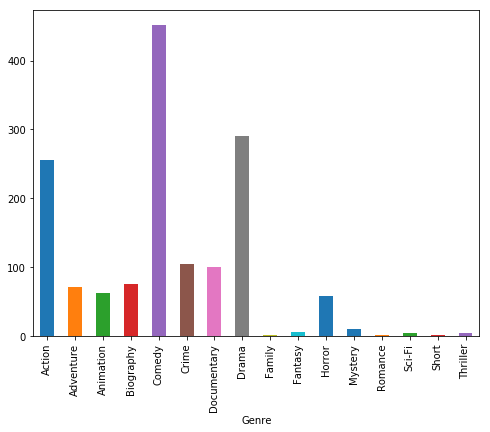

In [97]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(8,6))
df.groupby('Genre').Plot.count().plot.bar(ylim=0)
plt.show()

In [112]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf=TfidfVectorizer(sublinear_tf=True,lowercase=True,max_df=0.5,encoding= 'utf-8', norm = 'l2', stop_words='english', ngram_range=(1,2))


features = tfidf.fit_transform(df['Plot']).toarray()
labels=df.category_id
features.shape

X=df['Plot']
y=df['Genre']

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

X_train, X_test, y_train, y_test=train_test_split(X, y,test_size=0.33,random_state=42)

count_vect=CountVectorizer(stop_words='english', max_df=0.5, ngram_range=(1,2))
X_train_counts=count_vect.fit_transform(X_train)
tfidf_transformer=TfidfTransformer(sublinear_tf=True,smooth_idf=False)
X_train_tfidf=tfidf_transformer.fit_transform(X_train_counts)


logreg = LogisticRegression(C=1e9)
lg=logreg.fit(X_train_tfidf, y_train)
y_pred_class = lg.predict(count_vect.transform(X_test))
y_pred_class
print(metrics.accuracy_score(y_test, y_pred_class))


0.4808080808080808


In [99]:
lg.predict(count_vect.transform(['After being trapped in a jungle board game for 26 years, a Man-Child wins his release from the game. But, no sooner has he arrived that he is forced to play again, and this time sets the creatures of the jungle loose on the city. Now it is up to him to stop them.']))

array(['Adventure'], dtype=object)

In [100]:
from sklearn.model_selection import train_test_split
from sklearn.svm import LinearSVC
model = LinearSVC()
X_train, X_test, y_train, y_test= train_test_split(X, y, test_size=0.33, random_state=42)
X_train_counts=count_vect.fit_transform(X_train)
X_train_tfidf=tfidf_transformer.fit_transform(X_train_counts)
svc=model.fit(X_train_tfidf, y_train)
y_pred=svc.predict(count_vect.transform(X_test))
print(metrics.accuracy_score(y_test, y_pred))

0.48282828282828283


In [101]:
svc.predict(count_vect.transform(["After being trapped in a jungle board game for 26 years, a Man-Child wins his release from the game. But, no sooner has he arrived that he is forced to play again, and this time sets the creatures of the jungle loose on the city. Now it is up to him to stop them."]))

array(['Adventure'], dtype=object)

In [102]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB

X_train, X_test, y_train, y_test= train_test_split(X, y, test_size=0.33, random_state=42)
X_train_counts=count_vect.fit_transform(X_train)
X_train_tfidf=tfidf_transformer.fit_transform(X_train_counts)
clf=MultinomialNB().fit(X_train_tfidf, y_train)
y_pred=clf.predict(count_vect.transform(X_test))
print(metrics.accuracy_score(y_test, y_pred))

0.3595959595959596


In [103]:
clf.predict(count_vect.transform(['After being trapped in a jungle board game for 26 years, a Man-Child wins his release from the game. But, no sooner has he arrived that he is forced to play again, and this time sets the creatures of the jungle loose on the city. Now it is up to him to stop them.']))

array(['Adventure'], dtype='<U11')

In [104]:
from sklearn import metrics
print(metrics.classification_report(y_test, y_pred, target_names=df['Genre'].unique()))

             precision    recall  f1-score   support

  Animation       0.70      0.22      0.34        85
  Adventure       0.00      0.00      0.00        24
     Comedy       0.00      0.00      0.00        23
     Action       0.00      0.00      0.00        25
  Biography       0.34      1.00      0.50       153
      Crime       0.00      0.00      0.00        33
      Drama       0.00      0.00      0.00        28
    Fantasy       0.43      0.07      0.11        92
    Mystery       0.00      0.00      0.00         4
    Romance       0.00      0.00      0.00        19
     Sci-Fi       0.00      0.00      0.00         6
Documentary       0.00      0.00      0.00         1
     Horror       0.00      0.00      0.00         1
   Thriller       0.00      0.00      0.00         1

avg / total       0.30      0.36      0.24       495



C:\Users\nix12\Anaconda3\envs\PythonData2\lib\site-packages\sklearn\metrics\classification.py:1428: UserWarning: labels size, 14, does not match size of target_names, 16
  .format(len(labels), len(target_names))
C:\Users\nix12\Anaconda3\envs\PythonData2\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [105]:
features.shape

(1498, 83117)

In [108]:
X_train_tfidf.shape

(1003, 57773)

In [109]:
X_train_counts.shape

(1003, 57773)

In [110]:
X_train.shape

(1003, 83117)

In [106]:
from sklearn.feature_selection import chi2
import numpy as np

N=20
for Genre, category_id in sorted(category_to_id.items()):
    features_chi2 = chi2(features, labels == category_id)
    indices = np.argsort(features_chi2[0])
    feature_names = np.array(tfidf.get_feature_names())[indices]
    unigrams = [v for v in feature_names if len(v.split(' ')) == 1]
    bigrams = [v for v in feature_names if len(v.split(' '))==2]
    print("# '{}':".format(Genre))
    print(" . Most correlated unigrams:\n. {}".format('\n. '.join(unigrams[-N:])))
    print(" . Most correlated bigrams:\n. {}".format('\n. '.join(bigrams[-N:])))

# 'Action':
 . Most correlated unigrams:
. assassin
. fight
. space
. shaw
. captain
. mankind
. planet
. rogue
. arts
. hitman
. operative
. target
. katniss
. bandit
. weapon
. mission
. martial
. terrorist
. cia
. agent
 . Most correlated bigrams:
. tries remain
. remain loyal
. loyal partner
. partner best
. friend mobster
. witness protection
. master disguise
. evil entity
. wrong hands
. spider man
. cia agent
. pearl harbor
. protect world
. fight club
. action film
. black ops
. katniss everdeen
. captain america
. secret service
. martial arts
# 'Adventure':
 . Most correlated unigrams:
. stallion
. nardo
. imposed
. adventures
. zach
. bink
. lizzie
. bilbo
. dwarves
. thorin
. necromancer
. wink
. hobbit
. mowgli
. huckleberry
. nebraska
. sailing
. vandergelder
. huck
. gandalf
 . Most correlated bigrams:
. wrong turn
. chris wants
. takes wrong
. wants girlfriend
. caravan holiday
. tina world
. holiday takes
. soon conspire
. world events
. girlfriend tina
. conspire cou

# 'Short':
 . Most correlated unigrams:
. end
. order
. kill
. events
. criminal
. dangerous
. series
. travel
. master
. empire
. germany
. fu
. nazi
. unfortunate
. assassinated
. adolf
. kung
. hitler
. fury
. führer
 . Most correlated bigrams:
. time adolf
. events friend
. fury assassinated
. hitler kung
. fu master
. unfortunate series
. fury decides
. nazi germany
. führer kung
. assassinated dangerous
. friend kung
. kung führer
. decides travel
. dangerous kung
. hitler end
. time nazi
. criminal time
. nazi empire
. germany order
. kung fury
# 'Thriller':
 . Most correlated unigrams:
. captors
. divulge
. listen
. tense
. pov
. burglarize
. televisions
. reins
. catastrophe
. reformed
. earl
. ornithologist
. stashed
. shaye
. firefighters
. 37
. blackmailed
. embroiled
. crawls
. woodwork
 . Most correlated bigrams:
. crime try
. expose far
. child coma
. accident leaves
. unravel truth
. struggle tragic
. embroiled tense
. attempts expose
. far men
. cover attempts
. guilty

In [68]:
df[df['Plot']== "After being trapped in a jungle board game for 26 years, a Man-Child wins his release from the game. But, no sooner has he arrived that he is forced to play again, and this time sets the creatures of the jungle loose on the city. Now it is up to him to stop them."]

,Genre,Plot,category_id
1,Adventure,After being trapped in a jungle board game for...,1


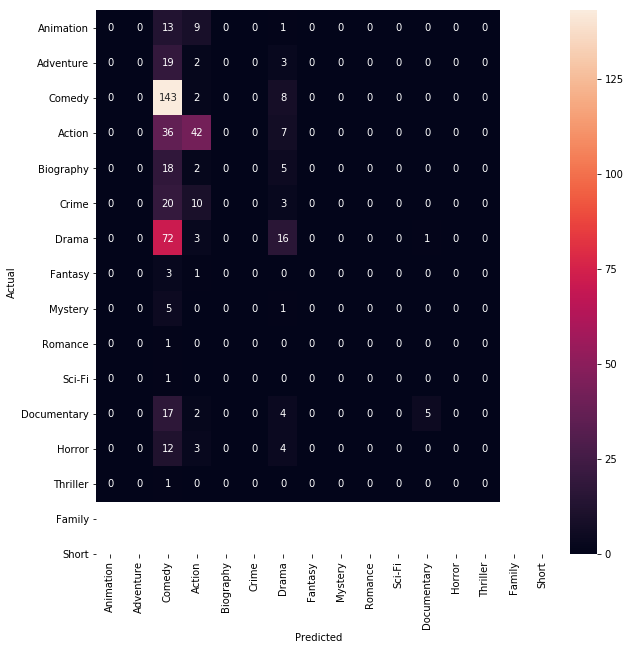

In [107]:
model = LinearSVC()

X_train, X_test, y_train, y_test, indices_train, indices_test = train_test_split(features, labels, df.index, test_size=0.33, random_state=42)
model.fit(X_train, y_train)
y_pred=model.predict(X_test)

from sklearn.metrics import confusion_matrix

conf_mat = confusion_matrix(y_test, y_pred)
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(conf_mat, annot=True, fmt='d', xticklabels=category_id_df.Genre.values, yticklabels=category_id_df.Genre.values)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()